In [1]:
!git clone https://github.com/Infernolia/vae-latent-text-alignment.git

Cloning into 'vae-latent-text-alignment'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 15), reused 47 (delta 8), pack-reused 0
Unpacking objects: 100% (54/54), 19.84 MiB | 2.24 MiB/s, done.


In [2]:
import os

In [3]:
os.chdir('/content/vae-latent-text-alignment')

In [4]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00


In [11]:
import torch
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm, trange
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive
import numpy as np
from IPython.display import display
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import gc
import seaborn as sns

from supervised_bvae import SupervisedBVAE


In [24]:
from google.colab import output
output.enable_custom_widget_manager()

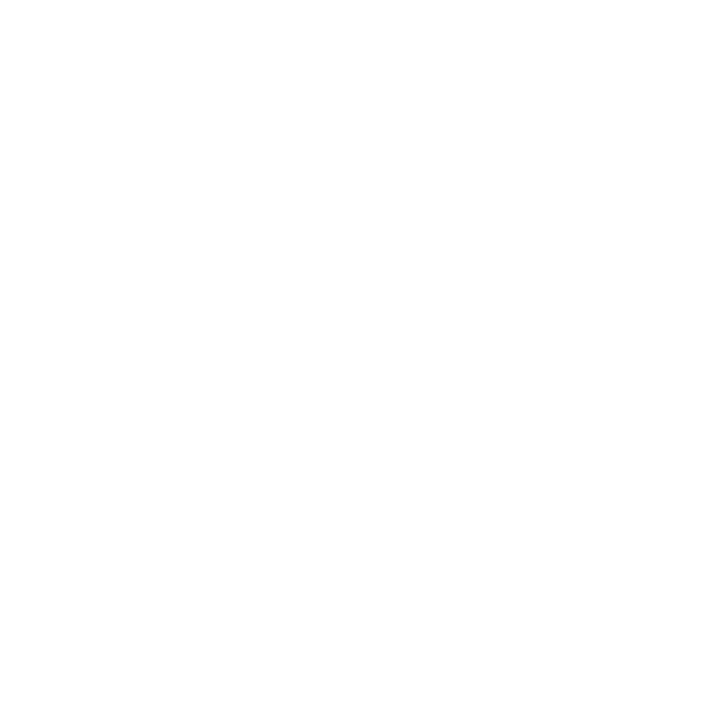

In [32]:
model = torch.load('models/1-bvae-16dim')
model.eval()
z_dim = model.z_dim
shape_z = model.random_z
#num_features = model.num_features

valid = torch.load('valid_shapes.pt')
valid_meta = pd.read_csv('valid_meta.csv')
valid_meta

valid_z = []
with torch.no_grad():
    for i in range(0, len(valid), 100):
        batch = valid[i:i+100].contiguous()
        _, _, _, z,_ = model(batch)
        valid_z.append(z)
valid_z = torch.vstack(valid_z)
valid_z.shape

tsne = TSNE(n_components=2, n_iter=300)
tsne_results = tsne.fit_transform(valid_z)
plt.figure(figsize=(10,10))
color_dict = {
    color: 'xkcd:'+color
    for color in valid_meta.color
}


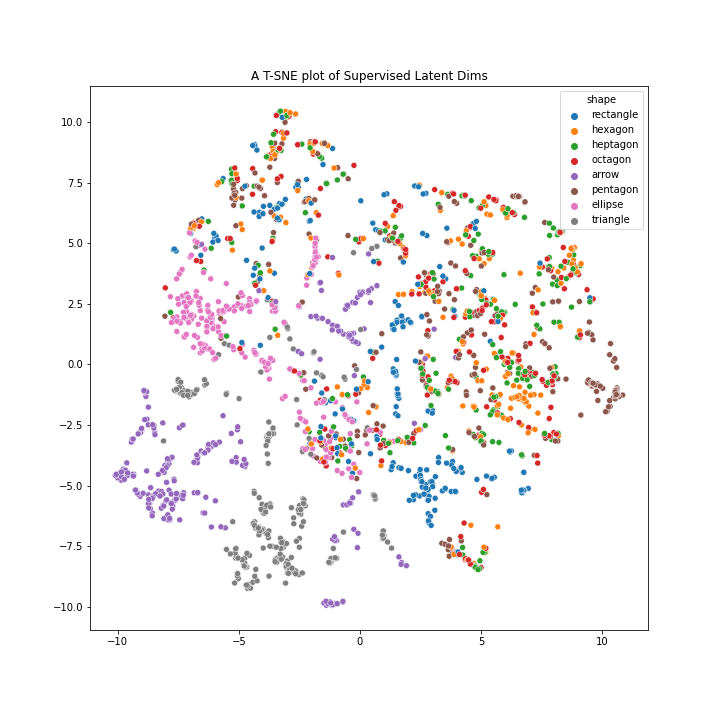

In [33]:
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=valid_meta['shape'],
#     hue=valid_meta.color,
#     palette=color_dict,
    legend="full"
).set(title='A T-SNE plot of Supervised Latent Dims');

plt.show()